# SIGN LANGUAGE INTREPRETATION USING COMPUTER VISION

### SYSTEM ARCHITECTURE

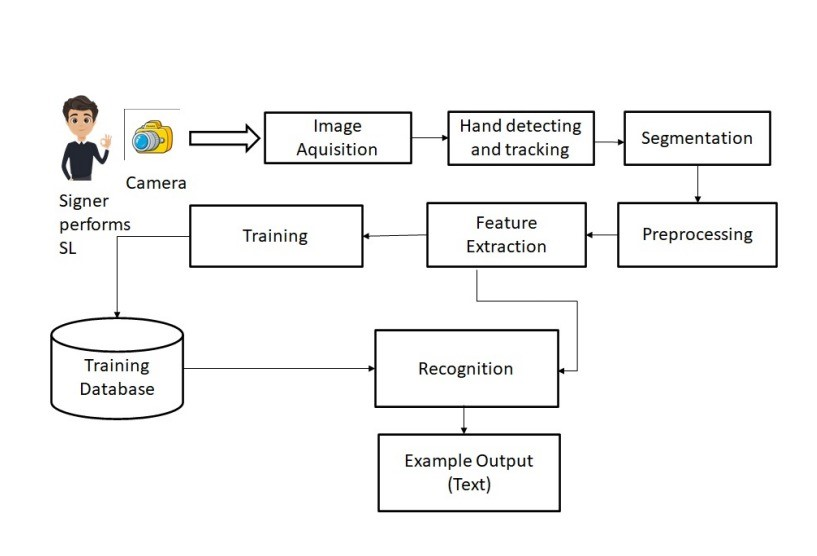

### Importing the Libraries

In [1]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
import os

print("Packages imported...")

Packages imported...


## Importing the Data

- immporting the data from folder 
- preprocessing the data
    -resizing
    -Normalizing

In [2]:
batch_size = 64
imageSize = 64
target_dims = (imageSize, imageSize, 3)
num_classes = 29

train_len = 87000
train_dir = 'E:/Imarticus/CV/asl_alphabet_train/asl_alphabet_train/'

def get_data(folder):
    X = np.empty((train_len, imageSize, imageSize, 3), dtype=np.float32)
    y = np.empty((train_len,), dtype=np.int)
    cnt = 0
    for folderName in os.listdir(folder):
        if not folderName.startswith('.'):
            if folderName in ['A']:
                label = 0
            elif folderName in ['B']:
                label = 1
            elif folderName in ['C']:
                label = 2
            elif folderName in ['D']:
                label = 3
            elif folderName in ['E']:
                label = 4
            elif folderName in ['F']:
                label = 5
            elif folderName in ['G']:
                label = 6
            elif folderName in ['H']:
                label = 7
            elif folderName in ['I']:
                label = 8
            elif folderName in ['J']:
                label = 9
            elif folderName in ['K']:
                label = 10
            elif folderName in ['L']:
                label = 11
            elif folderName in ['M']:
                label = 12
            elif folderName in ['N']:
                label = 13
            elif folderName in ['O']:
                label = 14
            elif folderName in ['P']:
                label = 15
            elif folderName in ['Q']:
                label = 16
            elif folderName in ['R']:
                label = 17
            elif folderName in ['S']:
                label = 18
            elif folderName in ['T']:
                label = 19
            elif folderName in ['U']:
                label = 20
            elif folderName in ['V']:
                label = 21
            elif folderName in ['W']:
                label = 22
            elif folderName in ['X']:
                label = 23
            elif folderName in ['Y']:
                label = 24
            elif folderName in ['Z']:
                label = 25
            elif folderName in ['del']:
                label = 26
            elif folderName in ['nothing']:
                label = 27
            elif folderName in ['space']:
                label = 28           
            else:
                label = 29
            for image_filename in os.listdir(folder + folderName):
                img_file = cv2.imread(folder + folderName + '/' + image_filename)
                if img_file is not None:
                    img_file = skimage.transform.resize(img_file, (imageSize, imageSize, 3))
                    img_arr = np.asarray(img_file).reshape((-1, imageSize, imageSize, 3))
                    
                    X[cnt] = img_arr
                    y[cnt] = label
                    cnt += 1
    return X,y
X_train, y_train = get_data(train_dir)
print("Images successfully imported...")

C:\Users\91824\AppData\Local\Temp/ipykernel_16016/2419396063.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.empty((train_len,), dtype=np.int)


Images successfully imported...


## Data Description

In [3]:
print("The shape of X_train is : ", X_train.shape)
print("The shape of y_train is : ", y_train.shape)

The shape of X_train is :  (87000, 64, 64, 3)
The shape of y_train is :  (87000,)


- There are 87000 images for training 
- we have 29 class

In [4]:
print("The shape of one image is : ", X_train[0].shape)

The shape of one image is :  (64, 64, 3)


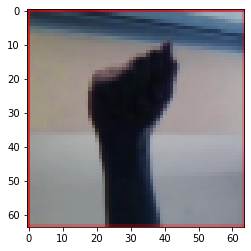

In [5]:
plt.imshow(X_train[0])
plt.show()

- Displaying a sample image
- Making a copy of images

In [6]:
X_data = X_train
y_data = y_train
print("Copies made...")

Copies made...


## Train Test Split

 - spliting the data into train and test
 - 70% for training 
 - 30% for testing 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)

## Encodding the data

- encoding the data into numerical form

In [8]:
# One-Hot-Encoding the categorical data
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

- Number of images in train and test

In [9]:
# Checking the dimensions of all the variables
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(60900, 64, 64, 3)
(60900,)
(26100, 64, 64, 3)
(26100,)
(60900, 29)
(26100, 29)


In [10]:
import gc
del X_data
del y_data
gc.collect()

3189

## Building the Deep Learning Model

### Importing the Libraries

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
print("Packages imported...")

Packages imported...


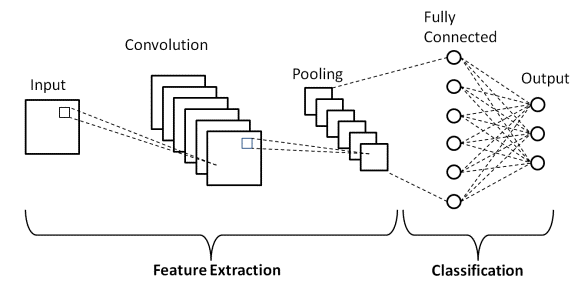

## Model Architecture

In [12]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 activation (Activation)     (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                    

In [13]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

## Compiling the model

In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Training the Model

In [15]:
model.fit(X_train, y_cat_train,
          epochs=5,
          batch_size=64,
          verbose=2,
          validation_data=(X_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/5
952/952 - 159s - loss: 1.0696 - accuracy: 0.6785 - val_loss: 0.2430 - val_accuracy: 0.9212 - 159s/epoch - 167ms/step
Epoch 2/5
952/952 - 145s - loss: 0.1535 - accuracy: 0.9503 - val_loss: 0.0939 - val_accuracy: 0.9696 - 145s/epoch - 152ms/step
Epoch 3/5
952/952 - 153s - loss: 0.0697 - accuracy: 0.9782 - val_loss: 0.0573 - val_accuracy: 0.9833 - 153s/epoch - 160ms/step
Epoch 4/5
952/952 - 158s - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.0373 - val_accuracy: 0.9897 - 158s/epoch - 166ms/step
Epoch 5/5
952/952 - 140s - loss: 0.0394 - accuracy: 0.9884 - val_loss: 0.0262 - val_accuracy: 0.9921 - 140s/epoch - 147ms/step


## Performance Analysis

 #### Measuring the accuracy and loss of the model

In [16]:
metrics = pd.DataFrame(model.history.history)
print("The model metrics are")
metrics

The model metrics are


,loss,accuracy,val_loss,val_accuracy
0,1.069622,0.678539,0.242955,0.921226
1,0.153503,0.950328,0.093917,0.969617
2,0.069710,0.978210,0.057315,0.983333
3,0.045735,0.986026,0.037250,0.989693
4,0.039362,0.988424,0.026240,0.992069


#### Visualization of loss

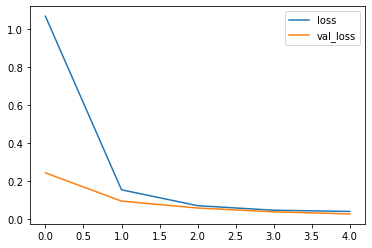

In [17]:
metrics[['loss','val_loss']].plot()
plt.show()

#### Visualization of Accuracy

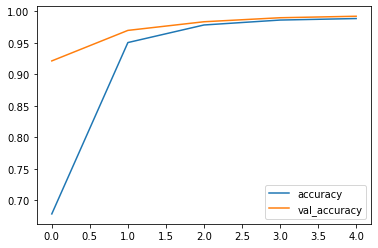

In [18]:
metrics[['accuracy','val_accuracy']].plot()
plt.show()

## Evaluation

In [20]:
model.evaluate(X_test,y_cat_test,verbose=0)

[0.026239989325404167, 0.9920689463615417]

In [21]:
# predictions = model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print("Predictions done...")

816/816 [==============================] - 12s 15ms/step
Predictions done...


## Evaluation Metrix

- calculating the confusion_matrix

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       900
           1       0.98      1.00      0.99       900
           2       1.00      1.00      1.00       900
           3       1.00      0.99      0.99       900
           4       0.97      0.98      0.98       900
           5       1.00      0.98      0.99       900
           6       0.98      1.00      0.99       900
           7       1.00      0.98      0.99       900
           8       1.00      0.99      0.99       900
           9       0.99      1.00      0.99       900
          10       0.99      0.99      0.99       900
          11       0.99      1.00      1.00       900
          12       0.99      0.99      0.99       900
          13       0.99      1.00      1.00       900
          14       0.99      1.00      0.99       900
          15       1.00      0.98      0.99       900
          16       0.98      1.00      0.99       900
          17       0.99    

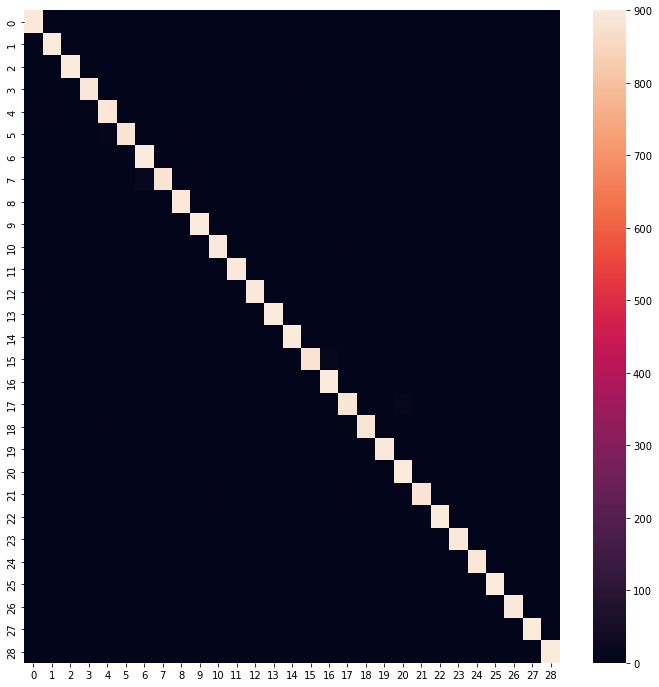

In [25]:
plt.figure(figsize=(12,12))
sns.heatmap(confusion_matrix(y_test,classes_x))
plt.show()

## Prediction

In [26]:
test1=model.predict(X_test[[5]]) 
classes_x=np.argmax(test1,axis=1)

1/1 [==============================] - 0s 24ms/step


In [27]:
classes_x

array([24], dtype=int64)

## Saving the Model

In [28]:
from keras.models import load_model
model.save('ASL.h5')
print("Model saved successfully...")

Model saved successfully...


## Loading the Model

In [29]:
import tensorflow as tf

# Load a saved Keras model from an HDF5 file
asl = tf.keras.models.load_model('ASL.h5')

# Using CV

- code for resizing and normalizing

In [30]:
# assume imgCrop is the cropped image of the hand gesture
#imgCrop = cv2.resize(imgCrop, (64, 64))  # resize the image to input shape of the CNN model
#imgCrop = imgCrop / 255.0  # normalize pixel values to be between 0 and 1
#imgCrop = np.expand_dims(imgCrop, axis=0)  # add batch dimension to the image

### DETECTING THE HANDS 

In [5]:
#DETECTING THE HANDS AND SKELETAL STRUCTURE
from cvzone.HandTrackingModule import HandDetector
import cv2

cap = cv2.VideoCapture(0)
detector = HandDetector(detectionCon=0.8, maxHands=2)
while True:
    # Get image frame
    success, img = cap.read()
    # Find the hand and its landmarks
    hands, img = detector.findHands(img)  # with draw
    # hands = detector.findHands(img, draw=False)  # without draw

    if hands:
        # Hand 1
        hand1 = hands[0]
        lmList1 = hand1["lmList"]  # List of 21 Landmark points
        bbox1 = hand1["bbox"]  # Bounding box info x,y,w,h
        centerPoint1 = hand1['center']  # center of the hand cx,cy
        handType1 = hand1["type"]  # Handtype Left or Right

        fingers1 = detector.fingersUp(hand1)

        if len(hands) == 2:
            # Hand 2
            hand2 = hands[1]
            lmList2 = hand2["lmList"]  # List of 21 Landmark points
            bbox2 = hand2["bbox"]  # Bounding box info x,y,w,h
            centerPoint2 = hand2['center']  # center of the hand cx,cy
            handType2 = hand2["type"]  # Hand Type "Left" or "Right"

            fingers2 = detector.fingersUp(hand2)

            # Find Distance between two Landmarks. Could be same hand or different hands
            length, info, img = detector.findDistance(lmList1[8], lmList2[8], img)  # with draw
            # length, info = detector.findDistance(lmList1[8], lmList2[8])  # with draw
    # Display
     # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    cv2.imshow("Image", img)
    cv2.waitKey(1)
cap.release()
cv2.destroyAllWindows()

ValueError: too many values to unpack (expected 2)

# PREDICTION 

In [1]:
## A to K

In [1]:
import cv2
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math

cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
classifier = Classifier("model_k.h5", "labels.txt")

offset = 20
imgSize = 300

folder = "Data/C"
counter = 0

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','K']

while True:
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        imgCropShape = imgCrop.shape

        aspectRatio = h / w

        if aspectRatio > 1:
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
            prediction, index = classifier.getPrediction(imgWhite, draw=False)
            print(prediction, index)

        else:
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize
            prediction, index = classifier.getPrediction(imgWhite, draw=False)

        cv2.rectangle(imgOutput, (x - offset, y - offset-50),
                      (x - offset+90, y - offset-50+50), (255, 0, 255), cv2.FILLED)
        cv2.putText(imgOutput, labels[index], (x, y -26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)
        cv2.rectangle(imgOutput, (x-offset, y-offset),
                      (x + w+offset, y + h+offset), (255, 0, 255), 4)


        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", imgWhite)
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break    

    cv2.imshow("Image", imgOutput)
    cv2.waitKey(1)

1/1 [==============================] - 1s 1s/step
[2.762093e-06, 1.4413977e-06, 4.9386543e-08, 3.356591e-07, 0.9999938, 9.385116e-07, 1.7115698e-10, 4.5170986e-10, 6.6570306e-07, 8.657082e-12] 4
1/1 [==============================] - 0s 49ms/step
[0.00082833227, 1.758223e-05, 0.43553475, 0.41423708, 0.005277391, 0.001993738, 0.00012121596, 3.545603e-05, 0.14195356, 8.9819525e-07] 2
1/1 [==============================] - 0s 47ms/step
[3.8834438e-05, 0.7801419, 0.0012784566, 0.0002158289, 0.009900521, 0.20831959, 9.11605e-09, 8.721481e-05, 1.7435661e-05, 1.3832748e-07] 1
1/1 [==============================] - 0s 47ms/step
[8.7872434e-07, 0.7832602, 5.252916e-05, 1.1161057e-05, 0.019448206, 0.19722451, 1.44185e-09, 1.9218894e-06, 5.464112e-07, 1.4190306e-09] 1
1/1 [==============================] - 0s 44ms/step
[4.0916112e-07, 0.15751117, 9.394632e-05, 0.006166088, 0.20008339, 0.6361348, 4.8976265e-08, 4.88115e-07, 9.559568e-06, 1.6251766e-08] 5
1/1 [==============================] - 0s 3

1/1 [==============================] - 0s 31ms/step
[1.6974113e-07, 3.4421246e-05, 0.00016426579, 0.47429752, 0.00427218, 0.52123, 8.5275484e-09, 5.4547695e-07, 8.044323e-07, 5.903214e-08] 5
1/1 [==============================] - 0s 31ms/step
[1.0698145e-07, 1.0608872e-05, 0.00014064548, 0.031232145, 0.0008604979, 0.9677547, 4.8413273e-09, 3.8344135e-07, 6.60947e-07, 2.3683096e-07] 5
1/1 [==============================] - 0s 47ms/step
[0.00031713166, 0.00067490846, 0.0025295266, 0.32600677, 0.015346324, 0.6549921, 5.793877e-07, 5.0921688e-05, 7.508346e-05, 6.6307034e-06] 5
1/1 [==============================] - 0s 47ms/step
[3.288764e-05, 0.00026006505, 0.0010889329, 0.3338996, 0.012097568, 0.6525592, 5.355474e-08, 3.064565e-05, 3.0668805e-05, 3.114597e-07] 5
1/1 [==============================] - 0s 47ms/step
[0.00035528003, 0.003016885, 0.000863405, 0.5265032, 0.28045404, 0.18839203, 4.7689593e-07, 0.000108611785, 0.00030444286, 1.7241916e-06] 3
1/1 [==============================] -

1/1 [==============================] - 0s 39ms/step
[6.578566e-07, 9.837782e-05, 4.295192e-06, 0.9977926, 0.0017453041, 0.00035790916, 8.638435e-09, 7.8856075e-08, 7.185698e-07, 1.3423794e-08] 3
1/1 [==============================] - 0s 47ms/step
[7.3836134e-07, 3.973395e-05, 1.010519e-05, 0.9995433, 7.2426315e-05, 0.00033321825, 3.8294193e-08, 9.908631e-08, 2.834768e-07, 3.6504904e-08] 3
1/1 [==============================] - 0s 39ms/step
[2.0460282e-05, 0.00086818566, 0.000117890006, 0.9732668, 0.017296035, 0.008362536, 1.7237979e-07, 6.71642e-07, 6.699845e-05, 1.5377138e-07] 3
1/1 [==============================] - 0s 37ms/step
[6.8243294e-06, 0.00055856514, 1.5542673e-05, 0.9875668, 0.011506769, 0.00029690063, 6.662605e-07, 7.834342e-07, 4.6547448e-05, 4.439276e-07] 3
1/1 [==============================] - 0s 31ms/step
[2.7177234e-06, 0.00058265054, 4.1239087e-05, 0.9720748, 0.02362216, 0.0036236001, 1.7077949e-07, 1.6164945e-07, 5.2536205e-05, 5.7798008e-08] 3
1/1 [===============

1/1 [==============================] - 0s 47ms/step
[0.0006314782, 7.507807e-07, 0.012935072, 0.0029852781, 1.3973694e-06, 2.169957e-06, 0.90223885, 9.1334164e-07, 0.08014071, 0.0010635088] 6
1/1 [==============================] - 0s 47ms/step
[0.00019729215, 1.8066487e-05, 0.0038791005, 0.01692277, 0.0008609325, 0.00039463115, 0.34743875, 2.962553e-06, 0.6294541, 0.00083142024] 8
1/1 [==============================] - 0s 31ms/step
[0.0057512945, 1.698654e-05, 0.07771984, 0.00489776, 0.00029241582, 0.0084594805, 0.22111076, 2.168614e-05, 0.681643, 8.6803484e-05] 8
1/1 [==============================] - 0s 47ms/step
[8.0664926e-05, 6.1980177e-06, 0.004165663, 0.20405872, 0.029461768, 0.089581005, 0.011702834, 2.4992055e-06, 0.66047597, 0.0004647179] 8
1/1 [==============================] - 0s 47ms/step
[0.0017505663, 1.0595073e-05, 0.007751984, 0.24302001, 0.012016056, 0.73013973, 0.0003485179, 4.062733e-06, 0.004761556, 0.00019696557] 5


In [2]:
## A to y 

In [5]:
import cv2
from cvzone.HandTrackingModule import HandDetector
from cvzone.ClassificationModule import Classifier
import numpy as np
import math

cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
classifier = Classifier("keras_model.h5", "labels.txt")

offset = 20
imgSize = 300

folder = "Data/C"
counter = 0

labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I','K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

while True:
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    if hands:
        hand = hands[0]
        x, y, w, h = hand['bbox']

        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y - offset:y + h + offset, x - offset:x + w + offset]

        imgCropShape = imgCrop.shape

        aspectRatio = h / w

        if aspectRatio > 1:
            k = imgSize / h
            wCal = math.ceil(k * w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize - wCal) / 2)
            imgWhite[:, wGap:wCal + wGap] = imgResize
            prediction, index = classifier.getPrediction(imgWhite, draw=False)
            print(prediction, index)

        else:
            k = imgSize / w
            hCal = math.ceil(k * h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize - hCal) / 2)
            imgWhite[hGap:hCal + hGap, :] = imgResize
            prediction, index = classifier.getPrediction(imgWhite, draw=False)

        cv2.rectangle(imgOutput, (x - offset, y - offset-50),
                      (x - offset+90, y - offset-50+50), (255, 0, 255), cv2.FILLED)
        cv2.putText(imgOutput, labels[index], (x, y -26), cv2.FONT_HERSHEY_COMPLEX, 1.7, (255, 255, 255), 2)
        cv2.rectangle(imgOutput, (x-offset, y-offset),
                      (x + w+offset, y + h+offset), (255, 0, 255), 4)


        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", imgWhite)
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break    

    cv2.imshow("Image", imgOutput)
    cv2.waitKey(1)

1/1 [==============================] - 1s 1s/step
[1.0821749e-09, 0.52920395, 1.1662899e-07, 5.041424e-12, 1.5057603e-07, 0.011967442, 4.0569268e-13, 2.3269606e-10, 2.3577623e-16, 2.3259928e-14, 6.704834e-17, 0.45866162, 2.0370318e-12, 9.800709e-12, 4.0949783e-07, 3.3869702e-12, 4.879202e-15, 8.085623e-19, 2.3306933e-05, 0.00014300393, 1.0598252e-10, 1.5447102e-09, 4.143846e-16, 4.839952e-10] 1
1/1 [==============================] - 0s 39ms/step
[1.1521416e-09, 0.9518805, 1.62764e-07, 4.7931213e-14, 2.4006795e-08, 0.0135099385, 4.0171583e-10, 2.4482225e-10, 1.0283189e-13, 5.484094e-14, 2.3906904e-16, 0.034593042, 9.0156806e-12, 3.1010442e-12, 3.6201095e-06, 6.1013763e-11, 4.893064e-15, 3.1639725e-17, 2.01159e-08, 1.0965729e-05, 2.401796e-09, 1.5451826e-06, 1.3499667e-15, 6.7112906e-09] 1
1/1 [==============================] - 0s 47ms/step
[1.192121e-11, 0.9999927, 2.087109e-10, 2.7157316e-16, 5.2087088e-11, 2.2270162e-07, 2.3366609e-11, 4.7811364e-12, 9.616579e-16, 2.9398777e-18, 2.696

1/1 [==============================] - 0s 31ms/step
[6.53313e-11, 0.9992219, 1.4783103e-07, 1.705295e-09, 4.7719304e-09, 1.3164362e-05, 2.2351492e-07, 5.1857113e-10, 2.9237244e-12, 1.2901891e-12, 1.0660421e-12, 6.960116e-05, 0.00031515595, 2.936296e-10, 9.671333e-05, 7.665855e-10, 6.309358e-10, 1.4576451e-17, 3.2171676e-10, 6.7420586e-07, 4.5567177e-09, 0.0002817619, 1.4216692e-14, 6.4585095e-07] 1
1/1 [==============================] - 0s 31ms/step
[3.797274e-10, 0.9979411, 2.8248226e-07, 4.6436717e-09, 1.5989559e-09, 3.234175e-05, 1.9089113e-07, 2.0042694e-10, 9.405805e-13, 4.7757306e-13, 7.0029594e-13, 0.0016946675, 4.6809946e-05, 2.0854993e-09, 0.00014164406, 4.3259183e-09, 2.7494104e-10, 3.673906e-18, 3.5710615e-10, 2.050409e-06, 4.2913882e-08, 0.00013977133, 2.116926e-14, 1.1464648e-06] 1
1/1 [==============================] - 0s 40ms/step
[2.0939668e-13, 0.99997306, 1.2440798e-09, 7.9496853e-13, 4.348734e-11, 2.397972e-07, 6.014906e-11, 6.057872e-12, 1.5057664e-14, 3.40989e-16, 

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
